# Fetal Health Midterm Notebook

## Import Data and Libraries

In [112]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement Machine Learning Models
import sklearn
from sklearn.tree import DecisionTreeClassifier      # Algorithm 1
from sklearn.ensemble import RandomForestClassifier  # Algorithm 2
from sklearn.ensemble import AdaBoostClassifier      # Algorithm 3


# Package to implement Grid Search Cross Validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingClassifier

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Package to import pickle
import pickle

# Package to record time
import time

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating F1 Score
from sklearn.metrics import f1_score

%matplotlib inline

In [113]:
df = pd.read_csv("fetal_health.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Equal number of nonnull values for all columns: table does not require cleaning

## Partition Data and Define Dummy Variables

In [114]:
df["fetal_health"] = df["fetal_health"].map({1.0: "Normal", 2.0: "Suspect", 3.0: "Pathological"})

df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,Suspect
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,Normal
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,Normal
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,Normal
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,Normal


In [115]:
# specify dummy variables
cat_var = ["histogram_tendency"]

outcome = ["fetal_health"]

predictors = df.columns.tolist()
predictors = predictors[:-1]

In [116]:
# Creating dummy variables and specifiy the set of input and output variables
X = pd.get_dummies(df[predictors], drop_first=True, columns = cat_var)
y = df[outcome]

# Data Partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [117]:
X.columns.tolist()

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency_0.0',
 'histogram_tendency_1.0']

## Decision Tree Classifier

#### Train model with first set of hyperparameters

In [118]:
# Defining Decision Tree Model
dtc = DecisionTreeClassifier(random_state = 1)

In [119]:
# Fit the model
start = time.time()            # Start Time
dtc.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Training time: 0.00957632064819336s


#### Evaluating Model Performance on Test Data

In [120]:
# Predictions on test set
y_pred = dtc.predict(test_X)


# Generating Classification Report
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)

# Save the report as a CSV File
report_df.to_csv('dt_class_report.csv') 

report_df

,Normal,Pathological,Suspect,accuracy,macro avg,weighted avg
precision,0.943199,0.885714,0.785714,0.917744,0.871542,0.915085
recall,0.964832,0.873239,0.698413,0.917744,0.845495,0.917744
f1-score,0.953893,0.879433,0.739496,0.917744,0.857607,0.915937
support,654.000000,71.000000,126.000000,0.917744,851.000000,851.000000


**Generating Confusion Matrix**

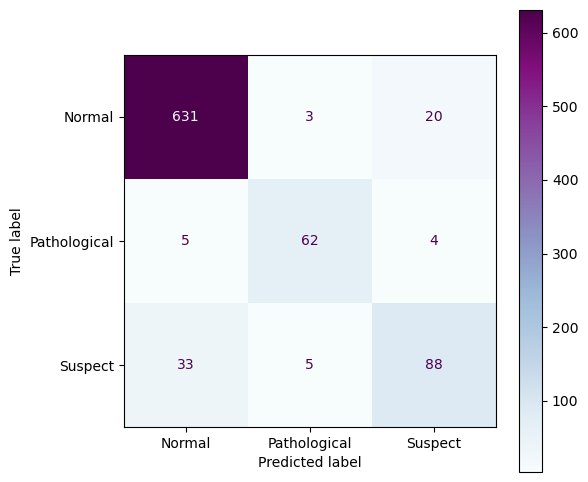

In [121]:
# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dtc.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (6, 6))

# Display Confusion Matrix
disp.plot(cmap = 'BuPu', ax = ax, values_format="d")

plt.savefig("dt_confusion_matrix.svg", bbox_inches='tight')

#### Feature Importance

In [122]:
# Storing importance values from the best fit model
importance = dtc.feature_importances_

In [123]:
# Displaying feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

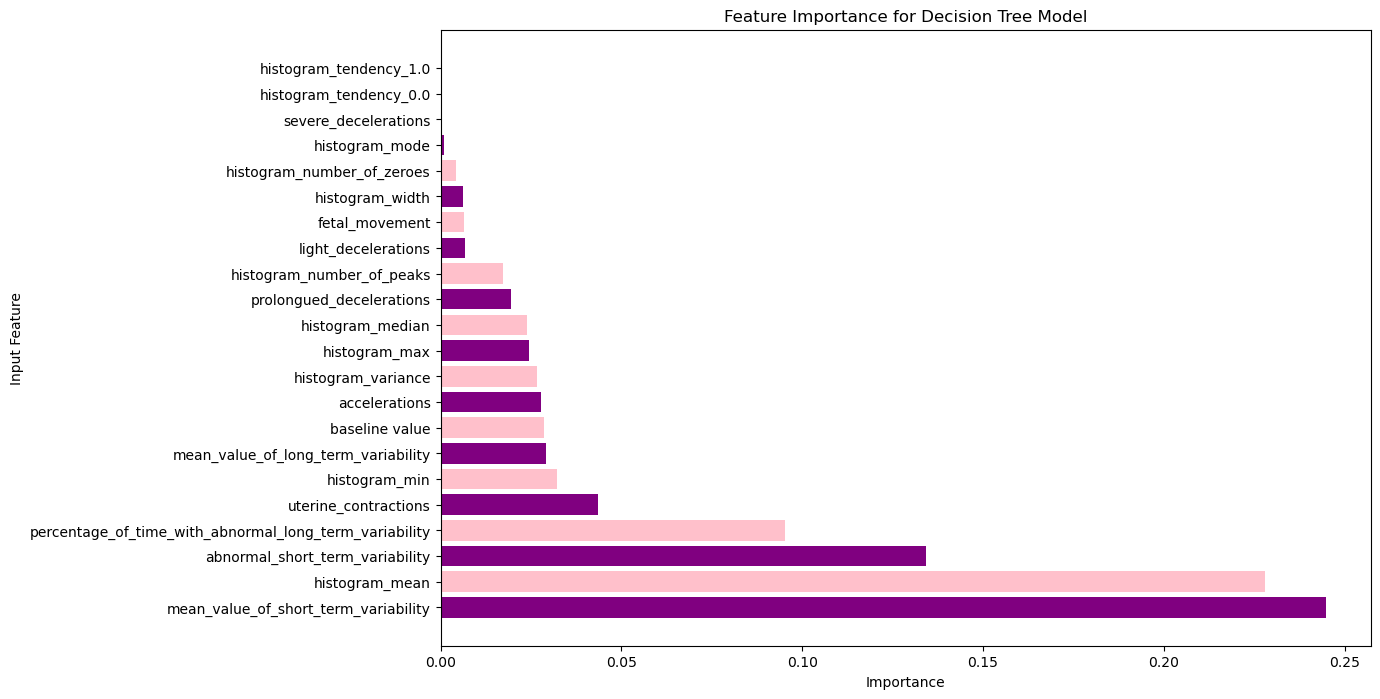

In [124]:
# Bar plot
plt.figure(figsize=(12, 8), dpi = 100)
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title("Feature Importance for Decision Tree Model")
plt.savefig("dt_feature_importance.svg", bbox_inches='tight');

## AdaBoost Classifier

### Hyperparameter Tuning

#### Train model with first set of hyperparameters

In [125]:
# Define your model
adaBoost = AdaBoostClassifier(algorithm = 'SAMME.R', random_state = 1)

In [126]:
# Fit the model
start = time.time()            # Start Time
adaBoost.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Training time: 0.08808398246765137s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


#### Evaluating Model Performance on Test Data

In [127]:
# Predictions on test set
y_pred = adaBoost.predict(test_X)

# Generating Classification Report
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)

# Save the report as a CSV File
report_df.to_csv('ada_class_report.csv') 

report_df

,Normal,Pathological,Suspect,accuracy,macro avg,weighted avg
precision,0.916413,0.924528,0.607143,0.86604,0.816028,0.871299
recall,0.922018,0.690141,0.674603,0.86604,0.762254,0.866040
f1-score,0.919207,0.790323,0.639098,0.86604,0.782876,0.866981
support,654.000000,71.000000,126.000000,0.86604,851.000000,851.000000


**Generating Confusion Matrix**

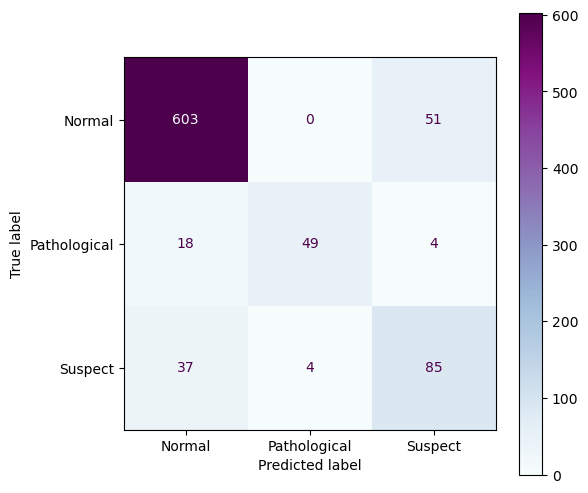

In [128]:
# Generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = adaBoost.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = adaBoost.classes_)

# Specify figure size and font size
fig, ax = plt.subplots(figsize = (6, 6))

# Display Confusion Matrix
disp.plot(cmap = 'BuPu', ax = ax, values_format="d")

plt.savefig("ada_confusion_matrix.svg", bbox_inches='tight')

#### Feature Importance

In [129]:
# Storing importance values from the best fit model
importance = adaBoost.feature_importances_

In [130]:
# Displaying feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

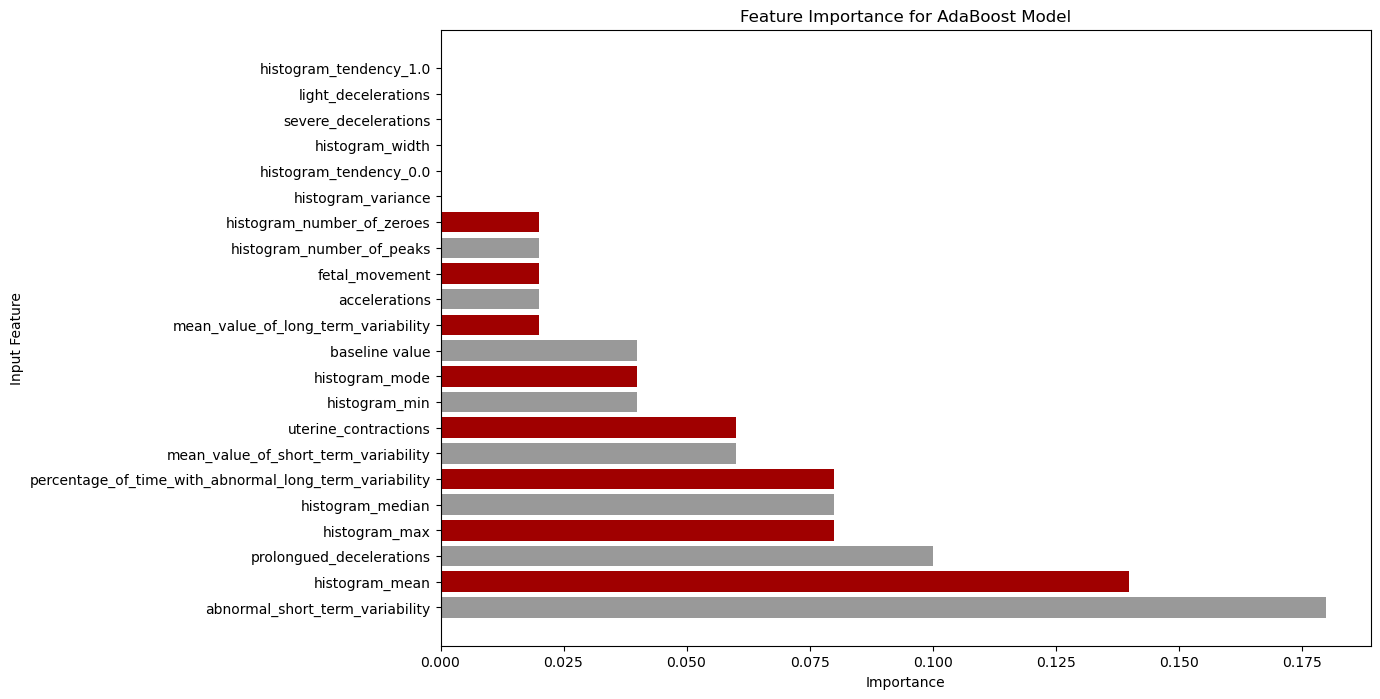

In [131]:
# Bar plot
plt.figure(figsize=(12, 8), dpi = 100)
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['#999999', '#a00000'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title("Feature Importance for AdaBoost Model");


plt.savefig("ada_feature_importance.svg", bbox_inches='tight');

## Random Forest Classifer

In [132]:
rfc = RandomForestClassifier(random_state = 1)

In [133]:
# Fit the model
start = time.time()            # Start Time
rfc.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Training time: 0.1422288417816162s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


#### Evaluating Model Performance on Test Data

In [134]:
# Predictions on test set
y_pred = rfc.predict(test_X)

# Generating Classification Report
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)

# Save the report as a CSV File
report_df.to_csv('rf_class_report.csv') 

report_df

,Normal,Pathological,Suspect,accuracy,macro avg,weighted avg
precision,0.943314,0.909091,0.886598,0.934195,0.913001,0.932061
recall,0.992355,0.845070,0.682540,0.934195,0.839988,0.934195
f1-score,0.967213,0.875912,0.771300,0.934195,0.871475,0.930589
support,654.000000,71.000000,126.000000,0.934195,851.000000,851.000000


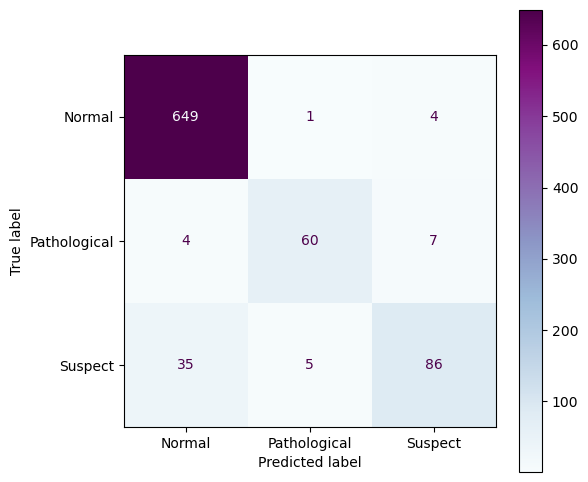

In [135]:
# Generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rfc.classes_)

# Specify figure size and font size
fig, ax = plt.subplots(figsize = (6, 6))

# Display Confusion Matrix
disp.plot(cmap = 'BuPu', ax = ax, values_format="d")

plt.savefig("rf_confusion_matrix.svg", bbox_inches='tight')

#### Feature Importance

In [136]:
# Storing importance values from the best fit model
importance = rfc.feature_importances_

In [137]:
# Displaying feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

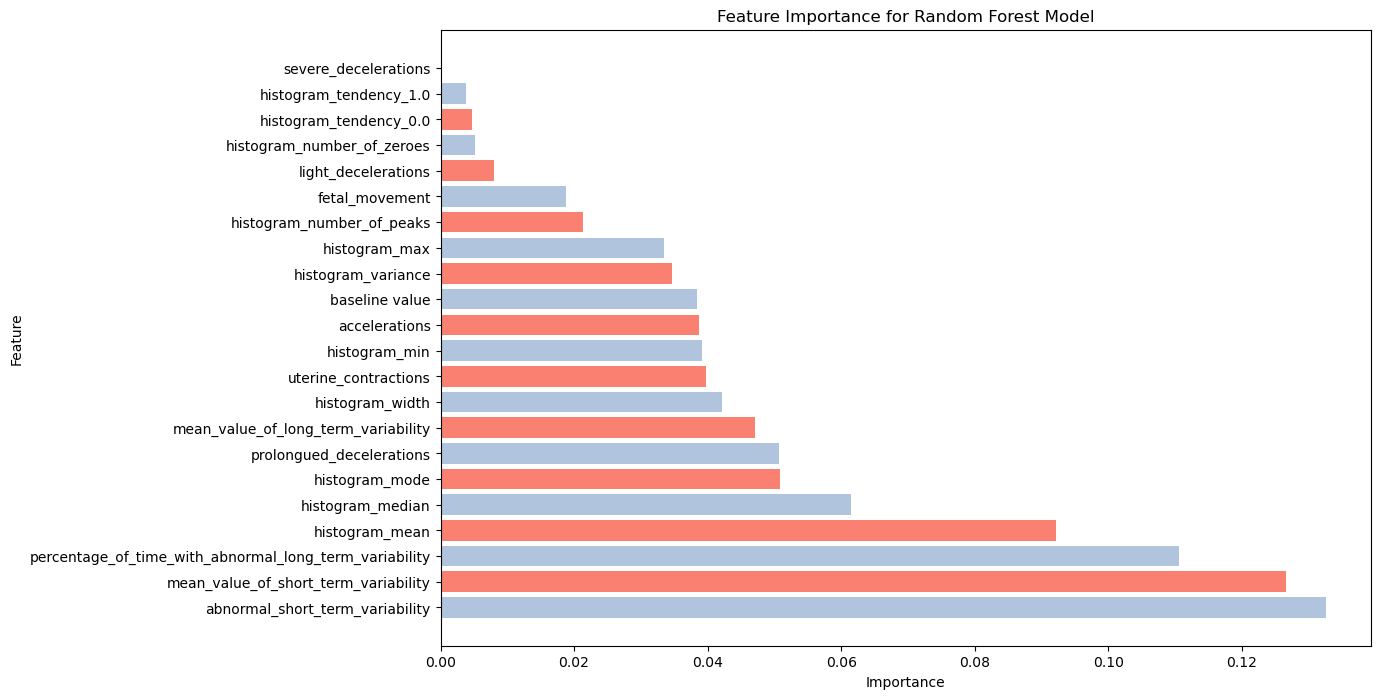

In [138]:
# Bar plot
plt.figure(figsize=(12, 8))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color =['lightsteelblue', 'salmon'])

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Random Forest Model")

plt.savefig("rf_feature_importance.svg", bbox_inches='tight');

## Soft Voting Classifier

In [139]:
# Macro average F1 scores for the classifiers
f1_scores = [0.9267103864351924, 0.8816905604190347, 0.9432373573417732]

# Normalize the scores
weights = [score / sum(f1_scores) for score in f1_scores]

# Output the weights
print("Normalized Weights:", weights)


Normalized Weights: [0.33678495644650774, 0.32042385769762544, 0.3427911858558667]


In [140]:
# Implement soft voting classifier on train data
soft_voting_clf = VotingClassifier(estimators = [('dt', dtc), ('ada', adaBoost), ('rf', rfc)],
                              voting = 'soft', weights=weights, n_jobs = -1)
soft_voting_clf.fit(train_X, train_y)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=1)),
                             ('ada', AdaBoostClassifier(random_state=1)),
                             ('rf', RandomForestClassifier(random_state=1))],
                 n_jobs=-1, voting='soft',
                 weights=[0.33678495644650774, 0.32042385769762544,
                          0.3427911858558667])

In [141]:
# Evaluate prediction performance on test data using macro averaged F1 Score
for clf in (dtc, adaBoost, rfc, soft_voting_clf):
    clf.fit(train_X, train_y)
    y_pred = clf.predict(test_X)
    print(clf.__class__.__name__, f1_score(test_y, y_pred, average = 'macro'))

DecisionTreeClassifier 0.8576070302037285
AdaBoostClassifier 0.7828758806930781


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier 0.8714753239812385
VotingClassifier 0.8646160030139042


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


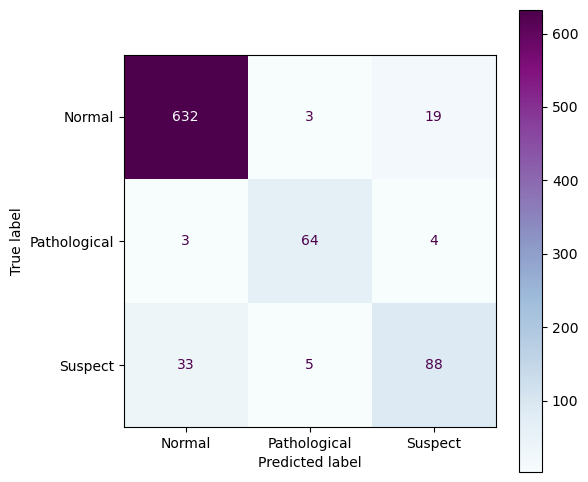

In [142]:
# Generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = soft_voting_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = soft_voting_clf.classes_)

# Specify figure size and font size
fig, ax = plt.subplots(figsize = (6, 6))

# Display Confusion Matrix
disp.plot(cmap = 'BuPu', ax = ax, values_format="d")

plt.savefig("vc_confusion_matrix.svg", bbox_inches='tight')

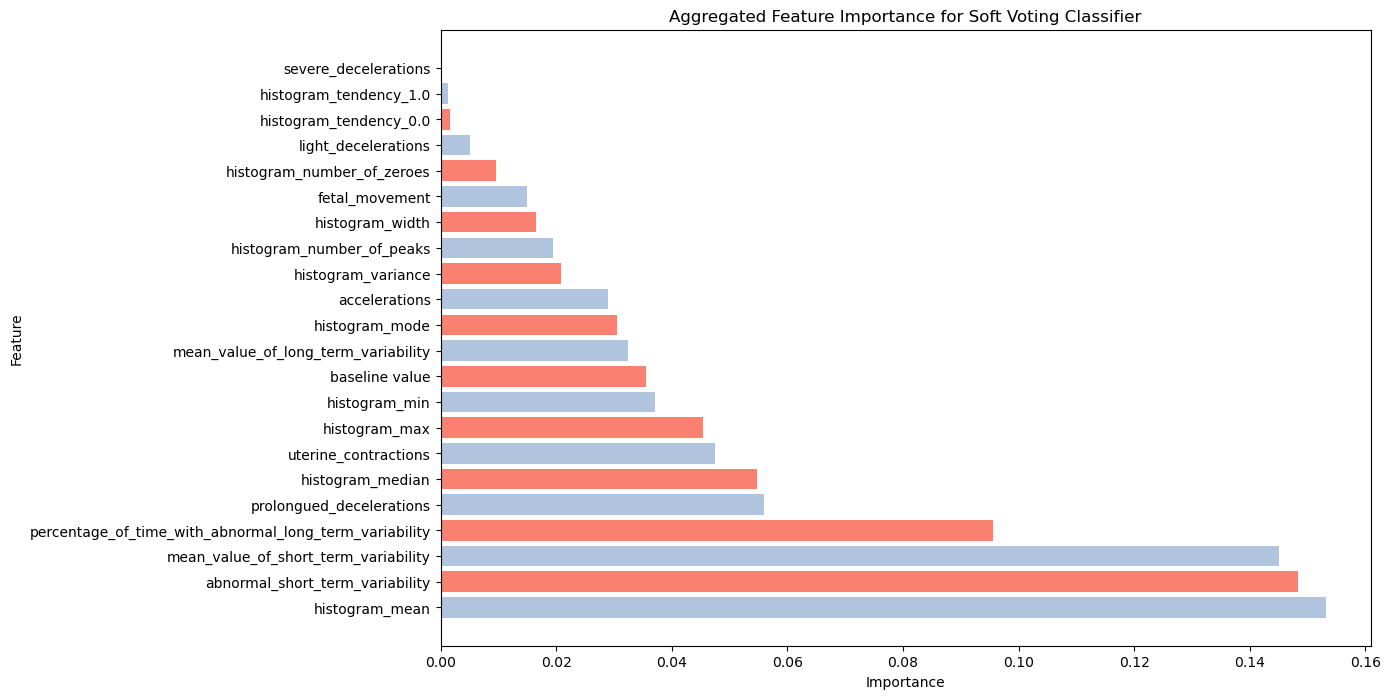

In [143]:

# Extract feature importances from individual models 
dtc_importance = dtc.feature_importances_
adaBoost_importance = adaBoost.feature_importances_
rfc_importance = rfc.feature_importances_

# Combine feature importances using the weights
combined_importance = (
    weights[0] * dtc_importance +
    weights[1] * adaBoost_importance +
    weights[2] * rfc_importance
)

# Create a dataframe for visualization
feature_imp = pd.DataFrame(list(zip(train_X.columns, combined_importance)),
                           columns=['Feature', 'Importance'])

# Sort the dataframe by importance
feature_imp = feature_imp.sort_values('Importance', ascending=False).reset_index(drop=True)

# Plot the feature importance as a bar plot
plt.figure(figsize=(12, 8))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color=['lightsteelblue', 'salmon'])

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Aggregated Feature Importance for Soft Voting Classifier")

plt.savefig("vc_feature_importance.svg", bbox_inches='tight');
plt.show()

In [144]:
# classification report
# Predictions on test set
y_pred = soft_voting_clf.predict(test_X)

# Generating Classification Report
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)

# Save the report as a CSV File
report_df.to_csv('vc_class_report.csv') 

report_df

,Normal,Pathological,Suspect,accuracy,macro avg,weighted avg
precision,0.946108,0.888889,0.792793,0.921269,0.875930,0.918634
recall,0.966361,0.901408,0.698413,0.921269,0.855394,0.921269
f1-score,0.956127,0.895105,0.742616,0.921269,0.864616,0.919423
support,654.000000,71.000000,126.000000,0.921269,851.000000,851.000000


### Pickle everything

In [145]:
# Creating the file where we want to write the model
dt_pickle = open('dt_fetal.pickle', 'wb') 

# Write RF model to the file
pickle.dump(dtc, dt_pickle) 

# Close the file
dt_pickle.close()

In [146]:
# Creating the file where we want to write the model
ada_pickle = open('ada_fetal.pickle', 'wb') 

# Write RF model to the file
pickle.dump(adaBoost, ada_pickle) 

# Close the file
ada_pickle.close()

In [147]:
# Creating the file where we want to write the model
rf_pickle = open('rf_fetal.pickle', 'wb') 

# Write RF model to the file
pickle.dump(rfc, rf_pickle) 

# Close the file
rf_pickle.close()

In [148]:
# Creating the file where we want to write the model
vc_pickle = open('vc_fetal.pickle', 'wb') 

# Write RF model to the file
pickle.dump(soft_voting_clf, vc_pickle) 

# Close the file
vc_pickle.close()